<a href="https://colab.research.google.com/github/xfiax/HASS-assignment1/blob/main/230406_latent_PCA_img_Grayscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# setup GAN

In [2]:
# HIDE OUTPUT
!git clone https://github.com/NVlabs/stylegan3.git
!pip install ninja

Cloning into 'stylegan3'...
remote: Enumerating objects: 207, done.
remote: Total 207 (delta 0), reused 0 (delta 0), pack-reused 207
Receiving objects: 100% (207/207), 4.16 MiB | 6.07 MiB/s, done.
Resolving deltas: 100% (101/101), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 16.3 MB/s eta 0:00:00


In [3]:
# https://www.youtube.com/watch?v=goQzp8QSb2s&t=171s NIVDEA

import sys
sys.path.insert(0, "/content/stylegan3")
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch
import dnnlib
import legacy

def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

def z2w(G, z_samples):
  # w shape (1, 14, 512)
  w_samples = G.mapping(torch.from_numpy(z_samples).to(device), None) 
  # w shape (1, 1, 512)
  w_samples = w_samples[:, :1, :].cpu().numpy().astype(np.float32)
  # w shape (num) 
  w_avg = np.mean(w_samples, axis=0, keepdims=True)      # [1, 1, C]
  w_avg_samples = 10000
  w_std = (np.sum((w_samples - w_avg) ** 2) / w_avg_samples) ** 0.5
  return w_samples

def display_image(image):
  plt.axis('off')
  plt.imshow(image,cmap='gray', vmin=0, vmax=255)
  plt.show()

def generate_image(G, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, 
        nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + G.input_shapes[1][1:])
    # [minibatch, height, width, channel]
    images = G.run(z, label, **G_kwargs) 
    return images[0]

def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail('Must specify class label with --class'\
                   'when using a conditional network')
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ('warn: --class=lbl ignored when running '\
            'on an unconditional network')
  return label

def generate_image(device, G, z, truncation_psi=1.0, 
                   noise_mode='const', class_idx=None):
  z = torch.from_numpy(z).to(device)
  label = get_label(G, device, class_idx)
  img = G(z, label, truncation_psi=truncation_psi, 
          noise_mode=noise_mode)
  # RGB
  # img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
  # return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')
  
  # grayscale
  img = (img.permute(0, 1, 2, 3) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
  return PIL.Image.fromarray(img[0].cpu().numpy()[0])

In [4]:
# HIDE CODE

URL = '/content/drive/MyDrive/Computer_Vision/0013-plan_stygan2/1024/experiments/00006-dataset-auto1-resumecustom/network-snapshot-000400.pkl'

print('Loading networks from "%s"...' % URL)
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as fp:
    G = legacy.load_network_pkl(fp)['G_ema']\
      .requires_grad_(False).to(device) 

Loading networks from "/content/drive/MyDrive/Computer_Vision/0013-plan_stygan2/1024/experiments/00006-dataset-auto1-resumecustom/network-snapshot-000400.pkl"...


#Generate and View GANS from Seeds

In [40]:
# HIDE OUTPUT 1
# Choose your own starting and ending seed.
SEED_FROM = 1
SEED_TO = 1000

dataZ = []
dataW = []
imgs = []

# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  z = seed2vec(G, i)
  w= z2w(G, z)
  img = generate_image(device, G, z)

  # display_image(img)

  dataZ.append(z.tolist())
  dataW.append(w.tolist())
  imgs.append(img)

Seed 1
Seed 2
Seed 3
Seed 4
Seed 5
Seed 6
Seed 7
Seed 8
Seed 9
Seed 10
Seed 11
Seed 12
Seed 13
Seed 14
Seed 15
Seed 16
Seed 17
Seed 18
Seed 19
Seed 20
Seed 21
Seed 22
Seed 23
Seed 24
Seed 25
Seed 26
Seed 27
Seed 28
Seed 29
Seed 30
Seed 31
Seed 32
Seed 33
Seed 34
Seed 35
Seed 36
Seed 37
Seed 38
Seed 39
Seed 40
Seed 41
Seed 42
Seed 43
Seed 44
Seed 45
Seed 46
Seed 47
Seed 48
Seed 49
Seed 50
Seed 51
Seed 52
Seed 53
Seed 54
Seed 55
Seed 56
Seed 57
Seed 58
Seed 59
Seed 60
Seed 61
Seed 62
Seed 63
Seed 64
Seed 65
Seed 66
Seed 67
Seed 68
Seed 69
Seed 70
Seed 71
Seed 72
Seed 73
Seed 74
Seed 75
Seed 76
Seed 77
Seed 78
Seed 79
Seed 80
Seed 81
Seed 82
Seed 83
Seed 84
Seed 85
Seed 86
Seed 87
Seed 88
Seed 89
Seed 90
Seed 91
Seed 92
Seed 93
Seed 94
Seed 95
Seed 96
Seed 97
Seed 98
Seed 99
Seed 100
Seed 101
Seed 102
Seed 103
Seed 104
Seed 105
Seed 106
Seed 107
Seed 108
Seed 109
Seed 110
Seed 111
Seed 112
Seed 113
Seed 114
Seed 115
Seed 116
Seed 117
Seed 118
Seed 119
Seed 120
Seed 121
Seed 122
Seed 123
S

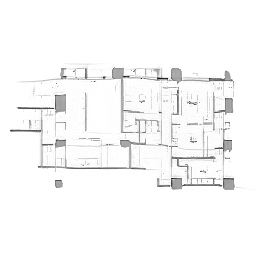

In [41]:
imgs[0]

## pca-w

In [42]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [43]:
dataW = np.array(dataW)
dataW =  np.squeeze(dataW, axis=(1,2,))
dataW.shape

(999, 512)

In [44]:
pcaW = PCA(2)
pcaW.fit(dataW)
XW_projected = pcaW.transform(dataW)

In [45]:
xw1 = XW_projected[:,0]
xw2 = XW_projected[:,1]

In [46]:
xw1.shape

(999,)

## plot with img

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

<ipython-input-55-5e4d14420ad2>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter(xw1,xw2,s=5,c='r',edgecolor = 'none',alpha=0.8,cmap = plt.cm.get_cmap('viridis',2))
<ipython-input-55-5e4d14420ad2>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xw1,xw2,s=5,c='r',edgecolor = 'none',alpha=0.8,cmap = plt.cm.get_cmap('viridis',2))


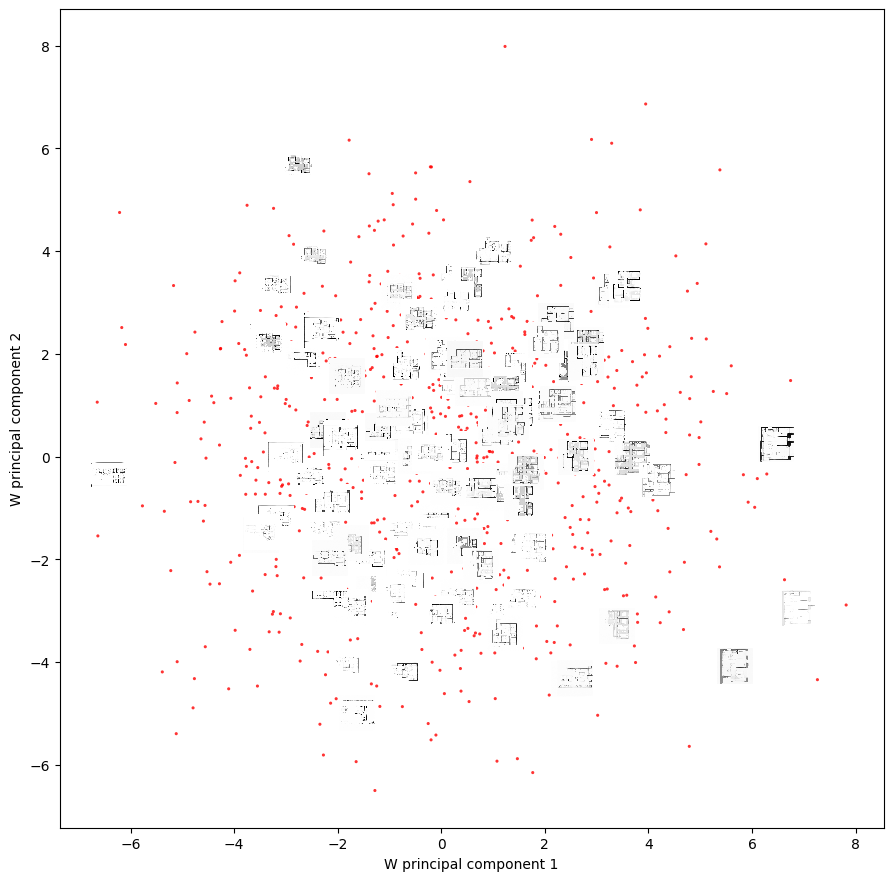

In [55]:
cm = 1/2.54  # centimeters in inches

fig,ax = plt.subplots(figsize = (27*cm, 27*cm))

ax.scatter(xw1,xw2,s=5,c='r',edgecolor = 'none',alpha=0.8,cmap = plt.cm.get_cmap('viridis',2))
plt.xlabel('W principal component 1')
plt.ylabel('W principal component 2')

for i in range(SEED_TO - SEED_FROM ):
  if i% 10 == 0 :
    imagebox = OffsetImage(imgs[i],zoom = 0.1,cmap="Greys_r")
    ab = AnnotationBbox(imagebox,(xw1[i],xw2[i]),frameon = False)
    ax.add_artist(ab)

fig.savefig('xGChart.png', dpi=300,bbox_inches = "tight")